## Lista de Exercícios #2 de Computação Gráfica

<hr>

<center>**Jonas de Araújo Luz Jr.**</center>
<center>unifor@jonasluz.com</center>


### Questão #1

Elimine o parâmetro *u* da seguinte equação vetorial: *r(u) = au<sup>2</sup> **i** + 2au **j***, onde *a* é um valor escalar.<br>
Verifique que esta equação vetorial corresponde à parábola cuja equação cartesiana é *y<sup>2</sup> = 4ax*. 

C:\Users\live\Anaconda3\lib\site-packages\ipykernel\__main__.py:38: RuntimeWarning: invalid value encountered in sqrt


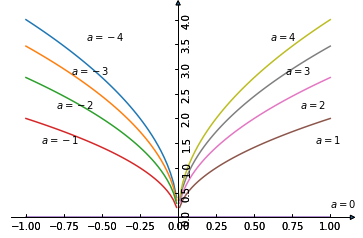

In [1]:
# Demonstração algébrica, sem código. 

# Desenho da parábola.
#
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.axislines import SubplotZero

def prep_axis():
    """
    Preparação dos eixos do gráfico
    """
    fig = plt.figure(1)
    ax = SubplotZero(fig, 111)
    fig.add_subplot(ax)

    for direction in ["xzero", "yzero"]:
        ax.axis[direction].set_axisline_style("-|>")
        ax.axis[direction].set_visible(True)

    for direction in ["left", "right", "bottom", "top"]:
        ax.axis[direction].set_visible(False)

    return ax

ax = prep_axis()

# Domínio da função (em a e x).
a = np.linspace(-4, 4, 9)
x = np.linspace(-1, 1, 100)

# Desenha gráfico
for ai in [int(af) for af in a]:
    
    # gráfico:
    y = np.sqrt(4 * ai * x)
    ax.plot(x, y)
    
    # anotação do valor de a:
    notex = -1 if ai < 0 else 1
    notey = np.abs(ai)
    if int(ai) != -10:
        dist = 15 * ai
        ax.annotate("$a={:d}$".format(int(ai)), 
                    xy=(notex, notey), xycoords='data', 
                    xytext=(-dist, 40-abs(dist) if ai != 0 else 10), 
                    textcoords='offset points')

plt.show()


### Questão #2

Considere a curva planar dada pela equação vetorial: *r(u) = - u **i** + 1/u **j**, u ≠ 0*.<br>
Construa uma tabela de valores para u e, então, esboce esta curva para -10 ≤ u ≤ 10.<br> 
Inclua considerações sobre -1 < u < 0 e 0 < u < 1. 

In [2]:
INF = float('Inf')

# Valores de u
u_table = [np.linspace(-10, 10, 21), np.linspace(-1, 1, 11)]

# Impressão das tabelas
#
for u in u_table:
    print('\nValores para u = {}...', u)
    # Equações paramétricas correspondentes 
    x = -u
    y = [1/ui for ui in u - [0]]

    # Equação de y em função de x
    yx = [-1/xi for xi in x - [0]];

    # Os vetores devem possuir o mesmo tamanho.
    assert len(u) == len(x) == len(y) == len(yx)
    print('Foram gerados {:d} pontos.'.format(len(u)))

    # Gerar o código LaTex da tabela de valores.
    print('$u$\t&$x$\t&$y$\t&$r(u)$\\\\ \midrule')
    for k, ui in enumerate(u):
        if y[k] == INF:
            continue
        print('{u:6.2}\t&{x:6.2}\t&{y:6.2f}\t&${x:6.2}\\mathbf{{i}} {signal} {yabs:6.2f}\\mathbf{{j}}$\\\\'.
              format(
                k=k+1, u=ui, 
                x=x[k],
                y=y[k],
                signal=('-' if y[k] < 0 else '+'),
                yabs=np.abs(y[k])
              )
             )


Valores para u = {}... [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.
   5.   6.   7.   8.   9.  10.]
Foram gerados 21 pontos.
$u$	&$x$	&$y$	&$r(u)$\\ \midrule
-1e+01	& 1e+01	& -0.10	&$ 1e+01\mathbf{i} -   0.10\mathbf{j}$\\
  -9.0	&   9.0	& -0.11	&$   9.0\mathbf{i} -   0.11\mathbf{j}$\\
  -8.0	&   8.0	& -0.12	&$   8.0\mathbf{i} -   0.12\mathbf{j}$\\
  -7.0	&   7.0	& -0.14	&$   7.0\mathbf{i} -   0.14\mathbf{j}$\\
  -6.0	&   6.0	& -0.17	&$   6.0\mathbf{i} -   0.17\mathbf{j}$\\
  -5.0	&   5.0	& -0.20	&$   5.0\mathbf{i} -   0.20\mathbf{j}$\\
  -4.0	&   4.0	& -0.25	&$   4.0\mathbf{i} -   0.25\mathbf{j}$\\
  -3.0	&   3.0	& -0.33	&$   3.0\mathbf{i} -   0.33\mathbf{j}$\\
  -2.0	&   2.0	& -0.50	&$   2.0\mathbf{i} -   0.50\mathbf{j}$\\
  -1.0	&   1.0	& -1.00	&$   1.0\mathbf{i} -   1.00\mathbf{j}$\\
   1.0	&  -1.0	&  1.00	&$  -1.0\mathbf{i} +   1.00\mathbf{j}$\\
   2.0	&  -2.0	&  0.50	&$  -2.0\mathbf{i} +   0.50\mathbf{j}$\\
   3.0	&  -3.0	&  0.33	&$  -3.0\mathbf{i} 

C:\Users\live\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\live\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: divide by zero encountered in double_scalars


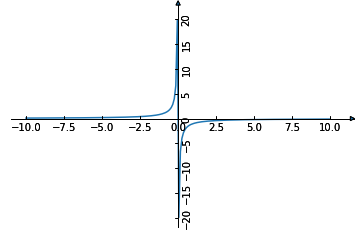

In [3]:
## Desenho do gráfico da função.
#

# Valores de u
u_plot  = [np.linspace(-10, 10, 200), np.linspace(-1, 1, 200)]
u = u_plot[0] # Mude de 0 para 1 aqui para plotar o gráfico entre -10 e 10 ou entre -1 e 1, respectivamente.

# Equações paramétricas da curva
x = -u
y = [1/ui for ui in u - [0]]

# Equação de y em função de x
yx = [-1/xi for xi in x - [0]]

# Desenha o gráfico.
ax = prep_axis()
ax.plot(x, yx)

plt.show()


### Questão #3

A curva 3D abaixo tem a seguinte equação vetorial: *r(θ) = θ / 360 **i** + 5 cos θ **j** + 3 sen θ **k***, onde θ é medido em graus.<br>
Identifique esta curva e descreva suas principais características.

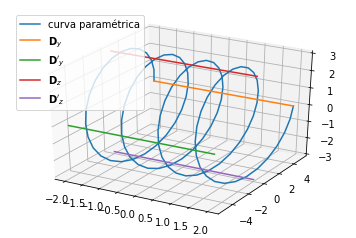

In [4]:
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

circle = 2 * np.pi
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)

x = theta / circle
y = 5 * np.cos(theta)
z = 3 * np.sin(theta)

plot_directors = True # Mude para True para plotar as retas diretoras.
if plot_directors: 
    ax.plot(x, y, z, label='curva paramétrica')
    ax.plot(x, [5 for xi in x], [0 for xi in x], label='$\mathbf{D}_y$')
    ax.plot(x, [-5 for xi in x], [0 for xi in x], label='$\mathbf{D\'}_y$')
    ax.plot(x, [0 for xi in x], [3 for xi in x], label='$\mathbf{D}_z$')
    ax.plot(x, [0 for xi in x], [-3 for xi in x], label='$\mathbf{D\'}_z$')
    ax.legend()
else:
    ax.plot(x, y, z)

fig = plt.figure()

plt.show()